In [2]:
!kaggle competitions download -c spaceship-titanic
from zipfile import ZipFile
import os
for i in os.listdir('C:/Users/mehmu/Desktop/PyProjects/Projects/Unlocked/KaggleComp/SpaceshipTitanic'):
    if '.zip' in i:
        print(i)
        with ZipFile(i, 'r') as zipObj:
            zipObj.extractall()
        os.remove(i)

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
spaceship-titanic.zip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import seaborn as sbn


df=pd.read_csv('train.csv')

df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Veri Doldurma

In [2]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'HomePlanet')

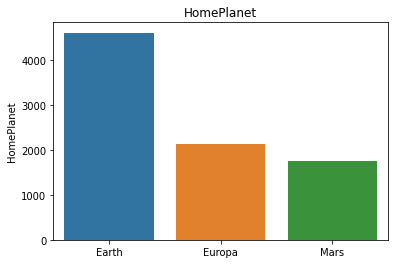

In [4]:
sbn.barplot(df['HomePlanet'].value_counts().index,df['HomePlanet'].value_counts()).set_title('HomePlanet')

c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Destination')

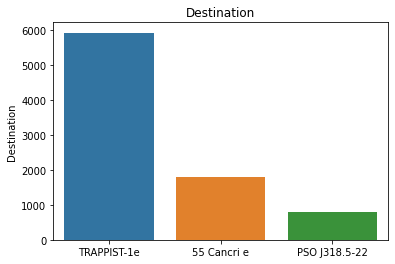

In [5]:
sbn.barplot(df['Destination'].value_counts().index,df['Destination'].value_counts()).set_title('Destination')

c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CryoSleep')

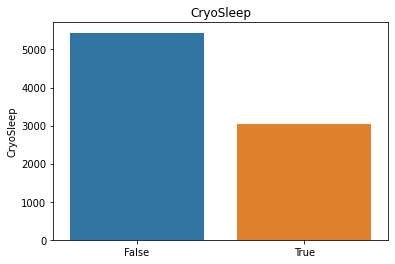

In [11]:
sbn.barplot(df['CryoSleep'].value_counts().index,df['CryoSleep'].value_counts()).set_title('CryoSleep')

c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'VIP')

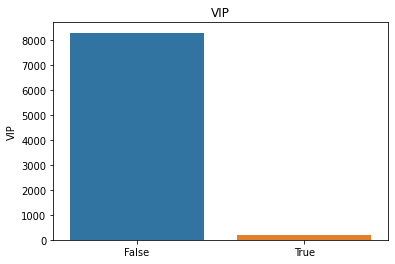

In [12]:
sbn.barplot(df['VIP'].value_counts().index,df['VIP'].value_counts()).set_title('VIP')

HomePlanet Earth yazılacak

CryoSleep,VIP mod girilecek

Destination'a mod girilecek

Cabin mod veya medyan ile doldurulabilir

Age ortalama ile doldurulacak 

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck ortalama ile doldurulabilir + toplanabilir

In [10]:
print(df['Age'].mean())
print(df['RoomService'].mean())
print(df['FoodCourt'].mean())
print(df['ShoppingMall'].mean())
print(df['Spa'].mean())
print(df['VRDeck'].mean())

28.82793046746535
224.687617481203
458.07720329024676
173.72916912197996
311.1387779083431
304.8547912992357


In [13]:
df['HomePlanet'].fillna('Earth',inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)
df['Age'].fillna(29,inplace=True)

df['RoomService'].fillna(225,inplace=True)
df['FoodCourt'].fillna(458,inplace=True)
df['ShoppingMall'].fillna(174,inplace=True)
df['Spa'].fillna(311,inplace=True)
df['VRDeck'].fillna(305,inplace=True)

In [14]:
df["Cabin"]= df["Cabin"].str.split("/", n = 1, expand = True)[0]
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

## Veriyi Düzenleme

PassengerId,Name atılacak

Homeplanet,CryoSleep,VIP,Transported sınıflandırılacak

Destination düzenlenip sınıflandırılabilir

Cabin in ilk harfler alındı



In [17]:
df.drop(['Name','PassengerId'],axis=1,inplace=True)

In [21]:
for i in ['CryoSleep','VIP','Transported']:
    df[i]=pd.get_dummies(df[i])[1]
df


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,1,B,TRAPPIST-1e,39.0,1,0.0,0.0,0.0,0.0,0.0,1
1,Earth,1,F,TRAPPIST-1e,24.0,1,109.0,9.0,25.0,549.0,44.0,0
2,Europa,1,A,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,6715.0,49.0,1
3,Europa,1,A,TRAPPIST-1e,33.0,1,0.0,1283.0,371.0,3329.0,193.0,1
4,Earth,1,F,TRAPPIST-1e,16.0,1,303.0,70.0,151.0,565.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,1,A,55 Cancri e,41.0,0,0.0,6819.0,0.0,1643.0,74.0,1
8689,Earth,0,G,PSO J318.5-22,18.0,1,0.0,0.0,0.0,0.0,0.0,1
8690,Earth,1,G,TRAPPIST-1e,26.0,1,0.0,0.0,1872.0,1.0,0.0,0
8691,Europa,1,E,55 Cancri e,32.0,1,0.0,1049.0,0.0,353.0,3235.0,1


In [23]:
for i in ['HomePlanet','Destination','Cabin']:
    df[i]=df[i].astype('category').cat.codes
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,1,1,2,39.0,1,0.0,0.0,0.0,0.0,0.0,1
1,0,1,5,2,24.0,1,109.0,9.0,25.0,549.0,44.0,0
2,1,1,0,2,58.0,0,43.0,3576.0,0.0,6715.0,49.0,1
3,1,1,0,2,33.0,1,0.0,1283.0,371.0,3329.0,193.0,1
4,0,1,5,2,16.0,1,303.0,70.0,151.0,565.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,1,0,0,41.0,0,0.0,6819.0,0.0,1643.0,74.0,1
8689,0,0,6,1,18.0,1,0.0,0.0,0.0,0.0,0.0,1
8690,0,1,6,2,26.0,1,0.0,0.0,1872.0,1.0,0.0,0
8691,1,1,4,0,32.0,1,0.0,1049.0,0.0,353.0,3235.0,1


In [24]:
df.to_csv('trainOr.csv')